In [165]:
import importlib
import utils
importlib.reload(utils)
from utils import *

In [117]:
fp = r"D:\PAKHUIYING\split_barge_door60x1\ASCII_data\bottom-4320"
df = import_ascii(fp)
describe_df = df.describe()
# y is not changing so exclude y surface

d:\PAKHUIYING\Fluent_python\utils.py:15: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  df = df.astype(float)


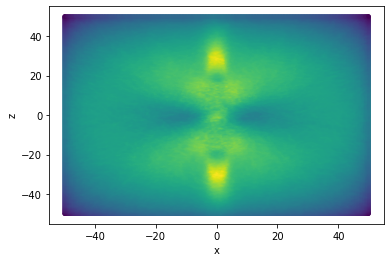

In [166]:
fluentpts = FluentPoints(df)
s1,s2,c = fluentpts.get_points()
fluentpts.plot_points()

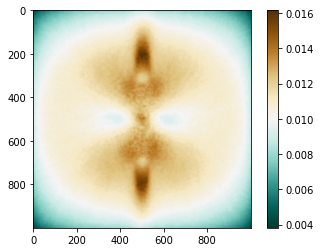

In [167]:
xi,yi,zi = grid(s1,s2,c, res1=1000, res2=1000)
plot_grid(zi,cmap="BrBG_r")

# Load multiple surfaces

Load the same surface and all of its corresponding time steps

In [126]:
directory = r"D:\PAKHUIYING\split_barge_door60x1\ASCII_data"
prefix = 'bottom'

In [131]:
fp_list = create_sorted_fp_list(directory,prefix)
print(len(fp_list))
fp_list[:10]

1000


['D:\\PAKHUIYING\\split_barge_door60x1\\ASCII_data\\bottom-4320',
 'D:\\PAKHUIYING\\split_barge_door60x1\\ASCII_data\\bottom-4330',
 'D:\\PAKHUIYING\\split_barge_door60x1\\ASCII_data\\bottom-4340',
 'D:\\PAKHUIYING\\split_barge_door60x1\\ASCII_data\\bottom-4350',
 'D:\\PAKHUIYING\\split_barge_door60x1\\ASCII_data\\bottom-4360',
 'D:\\PAKHUIYING\\split_barge_door60x1\\ASCII_data\\bottom-4370',
 'D:\\PAKHUIYING\\split_barge_door60x1\\ASCII_data\\bottom-4380',
 'D:\\PAKHUIYING\\split_barge_door60x1\\ASCII_data\\bottom-4390',
 'D:\\PAKHUIYING\\split_barge_door60x1\\ASCII_data\\bottom-4400',
 'D:\\PAKHUIYING\\split_barge_door60x1\\ASCII_data\\bottom-4410']

In [132]:
grid_tensor = create_tensor(fp_list,res1=1000,res2=1000)

d:\PAKHUIYING\Fluent_python\utils.py:15: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  df = df.astype(float)


In [135]:
save_tensor(grid_tensor,fp_list,'bottom',r"D:\PAKHUIYING\split_barge_door60x1\python_saved_tensor")


In [144]:
tensor_fp = r"D:\PAKHUIYING\split_barge_door60x1\python_saved_tensor\bottom_res11000_res21000_depth1000"
loaded_array = load_tensor(tensor_fp)

Load fp: D:\PAKHUIYING\split_barge_door60x1\python_saved_tensor\bottom_res11000_res21000_depth1000
array shape: (1000, 1000, 1000)


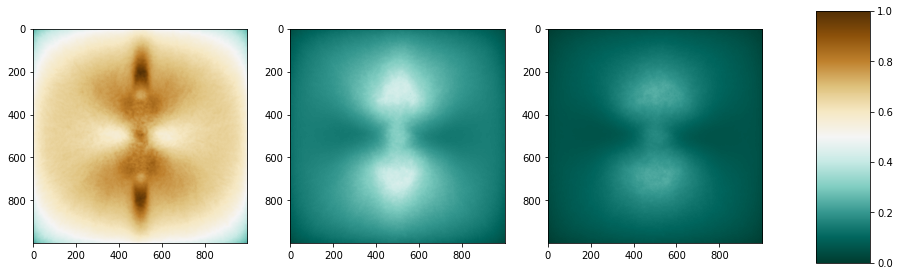

In [147]:
loaded_array_norm = normalise_tensor(loaded_array)


In [151]:
save_tensor(loaded_array_norm,fp_list,'bottom_norm',r"D:\PAKHUIYING\split_barge_door60x1\python_saved_tensor")

In [163]:
tensor_fp_norm = r"D:\PAKHUIYING\split_barge_door60x1\python_saved_tensor\bottom_norm_res11000_res21000_depth1000"
loaded_array_norm = load_tensor(tensor_fp_norm)

Load fp: D:\PAKHUIYING\split_barge_door60x1\python_saved_tensor\bottom_norm_res11000_res21000_depth1000
array shape: (1000, 1000, 1000)


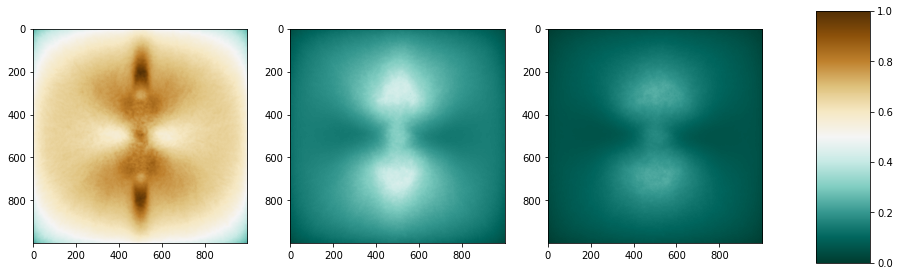

In [164]:
fig,axes = plt.subplots(1,3,figsize=(15,5))
for ax,i in zip(axes.flatten(),[0,loaded_array_norm.shape[2]//2,loaded_array_norm.shape[2]-1]):
    im = ax.imshow(loaded_array_norm[:,:,i],vmin=0,vmax=1,cmap="BrBG_r")

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)

plt.show()